In [32]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [34]:
df.shape

(5572, 5)

# 1. Data cleaning

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [36]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [37]:
df.sample(5)

,v1,v2
3449,ham,Ya just telling abt tht incident..
352,ham,TODAY is Sorry day.! If ever i was angry with ...
2059,ham,He didn't see his shadow. We get an early spri...
559,ham,Aiyo... U always c our ex one... I dunno abt m...
675,ham,"I dont knw pa, i just drink milk.."


In [38]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [40]:
df['Target'] = encoder.fit_transform(df['Target'])

In [41]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [43]:
df.duplicated().sum()

403

In [44]:
df = df.drop_duplicates(keep='first')

# 2.EDA - Exploratory Data Analysis

In [45]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [46]:
import matplotlib.pylab as plt

([<matplotlib.patches.Wedge at 0x3090e3cd0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

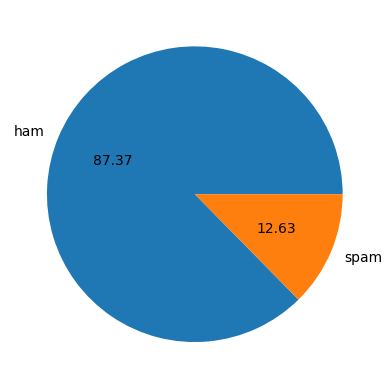

In [47]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [48]:
import nltk

In [49]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abhismacbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
df['num_characters'] = df['Text'].apply(len)

In [51]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [52]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/abhismacbook/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [53]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [54]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [55]:
#ham messages info
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [56]:
#spam messages info
df[df['Target'] == 1].describe()

,Target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [57]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

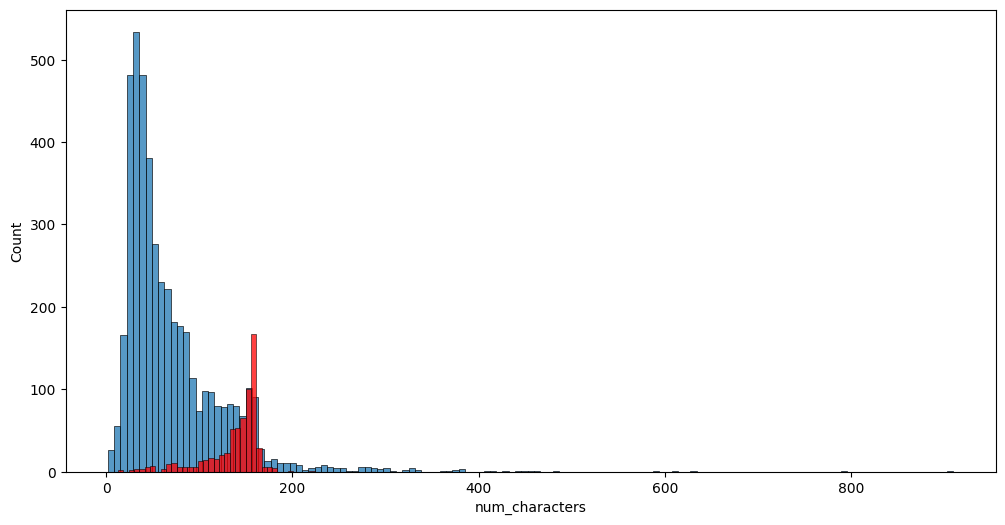

In [58]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

# 3. Data Preprocessing

In [59]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhismacbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [61]:
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [62]:
df['Transformed_text'] = df['Text'].apply(transform_text)
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

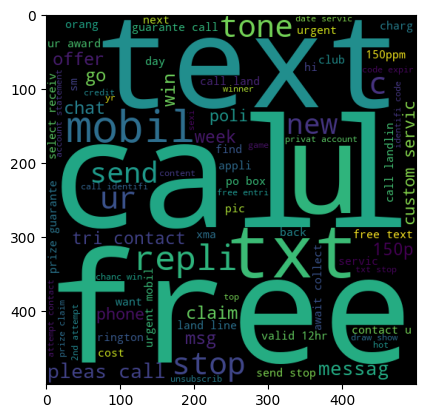

In [64]:
spam_wc = wc.generate(df[df['Target']==1]['Transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [65]:
spam_corpus = []
for msg in df[df['Target']==1]['Transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [66]:
len(spam_corpus)

9939

In [67]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [68]:
ham_corpus = []
for msg in df[df['Target']==0]['Transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

# 4. Model Building

In [69]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


- first we'll have to convert the text to numbers (vectors)
- data vectorization will be done using bag of words

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

df['Transformed_text'] = df['Transformed_text'].astype(str).fillna('')

X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [71]:
X.shape

(5169, 6708)

5169 messages
6708 words

In [72]:
Y = df['Target'].values

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [78]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


precision = 1 means that there were no false positives

In [79]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [81]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [82]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'LR' : lrc,
    'MNB' : mnb,
    'DT' : dtc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XGB' : xgb
}

In [83]:
def train_classifier(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)

    return accuracy, precision

In [84]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)

    print("For", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy:  0.9729206963249516
Precision:  0.9741379310344828
For KN
Accuracy:  0.9003868471953579
Precision:  1.0
For LR
Accuracy:  0.9516441005802708
Precision:  0.94
For MNB
Accuracy:  0.9593810444874274
Precision:  1.0
For DT
Accuracy:  0.9361702127659575
Precision:  0.8461538461538461
For RF
Accuracy:  0.971953578336557
Precision:  1.0
For AdaBoost
Accuracy:  0.9245647969052224
Precision:  0.8409090909090909
For BgC
Accuracy:  0.9584139264990329
Precision:  0.8625954198473282
For ETC
Accuracy:  0.9729206963249516
Precision:  0.9824561403508771
For GBDT
Accuracy:  0.9516441005802708
Precision:  0.9230769230769231
For XGB
Accuracy:  0.9748549323017408
Precision:  0.9516129032258065


In [85]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores, 'Precision': precision_scores}).sort_values('Precision',ascending=False)
performance_df 

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
3,MNB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,XGB,0.974855,0.951613
2,LR,0.951644,0.940000
9,GBDT,0.951644,0.923077
7,BgC,0.958414,0.862595
4,DT,0.936170,0.846154


In [86]:
performance_df1 = pd.melt(performance_df,id_vars="Algorithm")

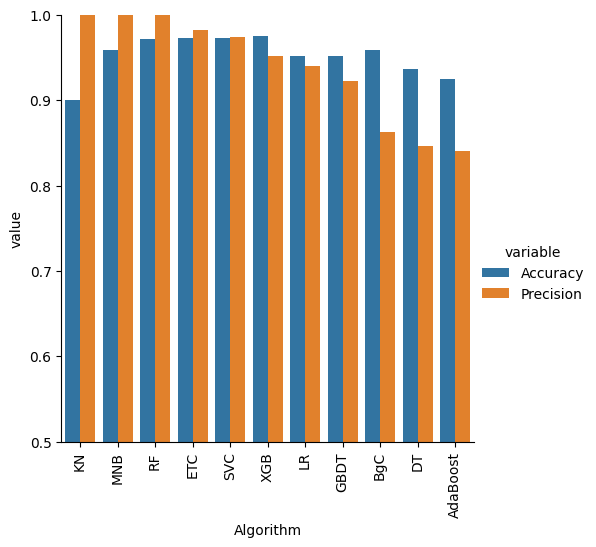

In [87]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# 5. Model Improvement

In [88]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['Transformed_text']).toarray()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [89]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)

    print("For", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865
For KN
Accuracy:  0.9052224371373307
Precision:  1.0
For LR
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703
For MNB
Accuracy:  0.9709864603481625
Precision:  1.0
For DT
Accuracy:  0.9274661508704062
Precision:  0.8118811881188119
For RF
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829
For AdaBoost
Accuracy:  0.9245647969052224
Precision:  0.8488372093023255
For BgC
Accuracy:  0.9584139264990329
Precision:  0.8682170542635659
For ETC
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406
For GBDT
Accuracy:  0.9468085106382979
Precision:  0.9191919191919192
For XGB
Accuracy:  0.9671179883945842
Precision:  0.9482758620689655


In [90]:
Y_train

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [92]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,MNB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,XGB,0.974855,0.951613,0.967118,0.948276
6,LR,0.951644,0.940000,0.958414,0.970297
7,GBDT,0.951644,0.923077,0.946809,0.919192
8,BgC,0.958414,0.862595,0.958414,0.868217
9,DT,0.936170,0.846154,0.927466,0.811881


In [93]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout

In [94]:
lstm_model = Sequential([
    Embedding(5000, 128),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2025-04-17 11:03:50.617537: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-04-17 11:03:50.617560: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-17 11:03:50.617565: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-17 11:03:50.617579: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-17 11:03:50.617587: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [95]:
gru_model = Sequential([
    Embedding(5000, 128),
    GRU(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [96]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))